<a href="https://colab.research.google.com/github/thihanaung-thnn/mathematics/blob/main/linear_algebra_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

## **Factorization** 



### **Matrix Decompositions**

> methods that reduce a matrix into constituent parts that make it easier to calculate more complex matrix operations  

- common analogy is factoring of numbers such as factoring of 10 in 2x5 and **also known as Matrix Factorization**  
- two simple and widely used methods are **LU** and **QR** matrix decomposition. 

**LU Decomposition** - for square matrices and decomposes a matrix into L and U components.  
> $A = L.U$ or $ A = LU $

A is square matrix that want to decompose and L is lower triangle matrix and U is upper triangle matrix.  

LU decomposition is found using an iterative numerical process and can fail for those matrices that cannot be decomposed or decomposed easily.
A variation of this decomposition that is numerically more stable to solve in practice is called **LUP** decomposition.   
> $A = L.U.P$  

The rows of the parent matrix are reordered to simplify the decomposition process and the additional P matrix specifies a way to permute the result or return the result to the original order.  
> `lu()` function in python from `scipy.linalg`

In [62]:
from scipy.linalg import lu  
A = np.array([
              [1,2,3],
              [4,5,6],
              [7,8,9]
])
P, L, U = lu(A)
print(f"Matrix A \n{A}")
print(f"P = \n{P} \nL = \n{L} \nU = \n{U}")

# reconstruct 
B = P @ L @ U
print(f"After reconstruct, matrix B \n{B}")

Matrix A 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
P = 
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 
L = 
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]] 
U = 
[[7.         8.         9.        ]
 [0.         0.85714286 1.71428571]
 [0.         0.         0.        ]]
After reconstruct, matrix B 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


**QR Decomposition** - for `n x m` matrices (not limited to square matrices) and decomposes a matrix into Q and R components.  
$A = Q.R$  
A is matrix want to decompose, Q is matrix with size `m x m` and R is upper triangle matrix with size `m x n`.  
QR decomposition is found using an iterative numerical method that can fail for those matrices that cannot be decompsed or decompsed easily.  
> `qr()` function in `numpy.linalg`   


In [63]:
A = np.array([[1,2],[3,4],[5,6]])
Q, R = np.linalg.qr(A, 'complete') 
# complete create n x n (3x3) matrix for Q, default will create 3 x 2 matrix

print(f"Matrix A \n{A}")
print(f"Q = \n{Q} \nR = \n{R}")

# reconstruct 
B = Q @ R 
print(f"After reconstructing \n{B}")

Matrix A 
[[1 2]
 [3 4]
 [5 6]]
Q = 
[[-0.16903085  0.89708523  0.40824829]
 [-0.50709255  0.27602622 -0.81649658]
 [-0.84515425 -0.34503278  0.40824829]] 
R = 
[[-5.91607978 -7.43735744]
 [ 0.          0.82807867]
 [ 0.          0.        ]]
After reconstructing 
[[1. 2.]
 [3. 4.]
 [5. 6.]]


**Cholesky Decomposition** - for square symmetric matrices where all values are greater than zero, so-called positive definite matrices.  
> $A = L.L^T$  

A is matrix being decomposed, L is lower triangular matrix and $L^T$ is transpose of T.  
> $A = U^T.U$  

U is upper triangular matrix.  
Cholesky decomposition is used for solving linear least squares for linear regression as well as simulation and optimization methods.When decomposing symmetric matrices, Cholesky is nearly twice as efficient as LU decomposition.  
> `cholesky()` in `numpy.linalg`

In [64]:
A = np.array([
              [2,1,1],
              [1,2,1],
              [1,1,2]])
L = np.linalg.cholesky(A)
print(f"Matrix A \n{A}")
print(f"Cholesky Matrix L\n{L}")
print(f"Reconstruct by L@transposeL \n{L@L.T}")

Matrix A 
[[2 1 1]
 [1 2 1]
 [1 1 2]]
Cholesky Matrix L
[[1.41421356 0.         0.        ]
 [0.70710678 1.22474487 0.        ]
 [0.70710678 0.40824829 1.15470054]]
Reconstruct by L@transposeL 
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


### **Eigendecomposition**  
Most used type of matrix decomposition is the eigendecompsition that decomposes a matrix into **eigenvectors** and **eigenvalues**. This method is also used in **PCA**.  

**Eigendecomposition of a Matrix** - type of decompsition that involves decomposing a square matrix into a set of eigenvectors and eigenvalues.  

A vector is an eigenvector of a matrix if it satisfies the following equation.  
> $A.\upsilon = \lambda .\upsilon$  

This is eigen equation, A is parent square matrix that want to decompose, $\upsilon$ is eigenvector of the matrix, and $\lambda$ is eigenvalue scalar.  

Not all square matrices can be decomposed into eigenvectors and eigenvalues. The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.  

> $A = Q.\Lambda.Q^T$   

$Q$ is a matrix comprised of the eigenvectors.  
$\Lambda$ is the diagonal matrix comporised of the eigenvalues.   
$Q^T$ is the transpose of matrix comprised of the eigenvectors.   

**Eigen** means **own** or **innate** in German word.   
Almost all vectors change direction, when they are multiplied by A. Certain exceptional vectors x are in the same direction as Ax. Those are the **eigenvectors**.  
**Eigenvectors** are unit vectors (magnitude or length is 1). **Eigenvalues** are coefficients applied to eigenvectors that give the vectors their length or magnitude. Certain matrix calculations become much easier when used the eigendecomposition of the matrix.  

> `numpy.linalg.eig()`

In [65]:
A = np.array([
              [1,2,3],
              [4,5,6],
              [7,8,9]])
eval, evec = np.linalg.eig(A)

print(f"Matrix A \n{A}")
print(f"Eigenvalue of A = {eval}")
print(f"Eigenvector of A \n{evec}")

Matrix A 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Eigenvalue of A = [ 1.61168440e+01 -1.11684397e+00 -9.75918483e-16]
Eigenvector of A 
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


**Confirm eigenvector** - by multipying of eigenvector by the value vector and comparing the result with the eigenvalue.  

In [66]:
print(A @ evec[:,0])
print(evec[:,0]*eval[0])

[ -3.73863537  -8.46653421 -13.19443305]
[ -3.73863537  -8.46653421 -13.19443305]


In [67]:
print(A @ evec[:,1])
print(evec[:,1]*eval[1])

[ 0.87764976  0.09688771 -0.68387434]
[ 0.87764976  0.09688771 -0.68387434]


**Reconstruct Matrix** 

> $A = Q.\Lambda.Q^T$  

$Q$ is eigenvector and $\Lambda$ is diagonal matrix of eigenvalue. 

In [68]:
Q = evec 
Lam = np.diag(eval)
Q_t = np.linalg.inv(Q)
Q.dot(Lam).dot(Q_t)
print(f"After reconstructing: \n{Q @ Lam @ Q_t}")

After reconstructing: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### **Singular Value Decomposition (SVD)**

All matrices have an SVD, and often used in compressing, denoising, data reduction, etc.   
SVD is matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculation simpler.  

> $A = U . \Sigma . V^T$  

Diagonal values in $\Sigma$ are known as the singular values of the original matrix A. The columns of the $U$ matrix are called the left singular vectors and columns of $V$ matrix are the right sigular matrix of $A$. SVD is calculated via iterative numerical methods. 

> `scipy.linalg.svd()` 

This function takes a matrix and returns U, Sigma, and Tranposed V elements. Sigma diagonal matrix is returned as a vector of singular values. V matrix returned in a transposed form. 

In [69]:
from scipy.linalg import svd
A = np.array([[1,2],[3,4],[5,6]])
U, s, V_t = svd(A)
print(f"Matrix A \n{A}\n")
print(f"U \n{U}\n")
print(f"s \n{s}\n")
print(f"V_t \n{V_t}")

Matrix A 
[[1 2]
 [3 4]
 [5 6]]

U 
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]

s 
[9.52551809 0.51430058]

V_t 
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


**Reconstruct Matrix** 
> $A = U . \Sigma . V^T$    
(3x2) = (3x3).(1x2).(2x2)

So, we have to construct Sigma to 3 x 2 matrix to multiply. 


In [70]:
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [71]:
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)
Sigma

array([[9.52551809, 0.        ],
       [0.        , 0.51430058],
       [0.        , 0.        ]])

In [72]:
U @ Sigma @ V_t

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

**For square matrices**

In [73]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
U, s, V_t = svd(A)

print(f"Matrix A \n{A}\n")
print(f"U \n{U}\n")
print(f"s \n{s}\n")
print(f"V_t \n{V_t}")

Matrix A 
[[1 2 3]
 [4 5 6]
 [7 8 9]]

U 
[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]

s 
[1.68481034e+01 1.06836951e+00 4.41842475e-16]

V_t 
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


In [74]:
# we can directly make diagnoal matrix of sigma to reconstruct 
U @ np.diag(s) @ V_t

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

### **Pseudoinverse**

Pseudoinverse is the generalization of the matrix inverse for square matrices to rectangular matrices where the number of rows and columns are not equal. It is called **Moore-Penrose Inverse**.  
Pseudoinverse is denoted as $A^+$ where $A$ is the matrix that is being inverted. Pseudoinverse is calculated using the singular value decomposition of A.  
> $A^+ = V^T . D^+ . U^T$  

Singular Value Decomposition  

> $A = U . \Sigma . V^T$    

$D^+$ can be calculated by creating a diagonal matrix from $\Sigma$, calculating the reciprocal of each non-zero element in $\Sigma$, and taking the transpose if the original matrix was rectangular.  

$\Sigma = \begin{pmatrix}
s_{1,1}&0&0 \\ 0&s_{2,2,}&0 \\ 0&0&s_{3,3}
\end{pmatrix}$

$D^+ = \begin{pmatrix}
\frac{1}{s_{1,1}}&0&0 \\ 0&\frac{1}{s_{2,2}}&0 \\ 0&0&\frac{1}{s_{3,3}}
\end{pmatrix}$  

Pseudoinverse provides one way of solving the linear regression equation, specifically when there are more rows than columns. Calculate directly from 
> `numpy.linalg.pinv()`

In [75]:
A = np.array([[0.1,0.2],[0.3,0.4],[0.5,0.6],[0.7,0.8]])
B = np.linalg.pinv(A)

print(f"Matrix A \n{A}\n")
print(f"Pseudoinverse of A \n{B}")

Matrix A 
[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]

Pseudoinverse of A 
[[-1.0000000e+01 -5.0000000e+00  8.4040814e-15  5.0000000e+00]
 [ 8.5000000e+00  4.5000000e+00  5.0000000e-01 -3.5000000e+00]]


Calculate manually via SVD. 


In [76]:
U, s, V_t = svd(A)
d = 1.0 / s
D = np.zeros(A.shape)
D[:A.shape[1], :A.shape[1]] = np.diag(d)
C = V_t.T @ D.T @ U.T

print(f"Matrix A \n{A}\n")
print(f"Calculate manually pseudoinverse of A \n{C}\n")
print(f"Calculate from pinv() \n{B}")


Matrix A 
[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]

Calculate manually pseudoinverse of A 
[[-1.00000000e+01 -5.00000000e+00  1.42578328e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]

Calculate from pinv() 
[[-1.0000000e+01 -5.0000000e+00  8.4040814e-15  5.0000000e+00]
 [ 8.5000000e+00  4.5000000e+00  5.0000000e-01 -3.5000000e+00]]


### **Dimensionality Reduction**

Popular application of SVD is dimensionality reduction. Data with a large number of features, such as more features (columns) than observations (rows) may be reduced to a smaller subset of features that are most relevant to the prediction problem.  The result is a matrix with a **lower rank** that is said to approximate the original matrix.  

To do this, select top `k` largest singular values in $\Sigma$. Columns can be selected from $\Sigma$ and rows selected from $V^T$. An approximate $B$ of the original vector $A$ can be reconstructed.  

> $B = U . \Sigma_k . V_k^T$  

In NPL, this approach can be used on matrices of word occurances or word frequencies in documents and is called **Latent Sematic Analysis or Latent Sematic Indexing**.  In practice, we can retain and work with a descriptive supset of the data called $T$, dense summary of the matrix or a projection.  
> $T = U . \Sigma_k$  

> $T = A . V_k^T $

In [77]:
A = np.array([
              [1,2,3,4,5,6,7,8,9,10],
              [11,12,13,14,15,16,17,18,19,20],
              [21,22,23,24,25,26,27,28,29,30]])
print(A)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]


In [78]:
U, s, V = svd(A)
Sigma = np.zeros((A.shape[0],A.shape[1]))
Sigma[:A.shape[0], :A.shape[0]] = np.diag(s)
n_elements = 2
Sigma = Sigma[:, :n_elements]
V = V[:n_elements, :]
print(f"Sigma \n{Sigma}")
print(f"V \n{V}")

Sigma 
[[96.96573419  0.        ]
 [ 0.          7.25578339]
 [ 0.          0.        ]]
V 
[[-0.24139304 -0.25728686 -0.27318068 -0.2890745  -0.30496832 -0.32086214
  -0.33675595 -0.35264977 -0.36854359 -0.38443741]
 [-0.53589546 -0.42695236 -0.31800926 -0.20906617 -0.10012307  0.00882003
   0.11776313  0.22670623  0.33564933  0.44459242]]


In [79]:
# reconstruct
B = U @ Sigma @ V
print(B)
print('-'*30)
# transform  
T = U @ Sigma
print(T)
print('-'*30)
T = A @ V.T
print(T)


[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
------------------------------
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
------------------------------
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


Calculated directly
> `sklearn.decomposition.TruncatedSVD`

In [80]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=2)
svd.fit(A)
print(svd.transform(A))

[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


## **Linear Algebra in Statistics**

### **Introduction to Multivariate Statistics**

**Expected Value and Mean** 
In probability, the average value of some random variable X is called the expected value or he expectation.  

> $E[X] = \sum x_1*p_1, x_2*p_2,\cdots,x_n*p_n$  

In simple case, where probabilities are equal for example, rolling a dice, flipping a coin, 

> $E[X] = \frac{1}{n} \sum x_1, x_2, \cdots, x_n$  

> $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$  


In [81]:
a = np.array([1,2,3,4,5,6])
np.mean(a)

3.5

In [82]:
M = np.array([[1,2,3,4,5],[1,2,3,4,5]])
print(M)
print(f"Column means = {np.mean(M, axis=0)}")
print(f"Row means = {np.mean(M, axis=1)}")

[[1 2 3 4 5]
 [1 2 3 4 5]]
Column means = [1. 2. 3. 4. 5.]
Row means = [3. 3.]


**Variance and Standard Deviation**  
Variance of some random variable X is a measure of how much values in the distribution vary on average with respect to the mean.  

> $Var[X] = E[(X - E[X])^2]$  

sum of the square difference of each from the expected value multiplied by the probability of that value.  

> $Var[X] = \sum p(x_1)*(x_1 - E[X])^2, p(x_2)*(x_2 - E[X])^2, \cdots, p(x_n)*(x_n - E[X])^2$  

if the probability of each in the distribution is equal,  
> $Var[X] = \frac{1}{n} \sum (x_1 - E[X])^2, (x_2 - E[X])^2, \cdots, (x_n - E[X])^2$  

sample variance  
> $\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2 $  


In [83]:
v = np.array([1,2,3,4,5,6])
print(v)
print(f"sample variance : {np.var(v, ddof=1)}") 
# ddof = 1 => sample variance, default is population variance
print(f"population variance : {np.var(v)}")

[1 2 3 4 5 6]
sample variance : 3.5
population variance : 2.9166666666666665


In [84]:
M = np.array([[1,2,3,4,5,6],[1,2,3,4,5,6]])
print(M)
print(f"Variance of Columns : {np.var(M, ddof=1, axis=0)}")
print(f"Variance of Rows    : {np.var(M, ddof=1, axis=1)}")

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
Variance of Columns : [0. 0. 0. 0. 0. 0.]
Variance of Rows    : [3.5 3.5]


**Standard Deviation** is the square root of the variance.  

> $s = \sqrt{\sigma^2}$  

In [85]:
print(M)
print(f"Standard deviation of Columns : {np.std(M, ddof=1, axis=0)}")
print(f"Standard deviation of Rows    : {np.std(M, ddof=1, axis=1)}")

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
Standard deviation of Columns : [0. 0. 0. 0. 0. 0.]
Standard deviation of Rows    : [1.87082869 1.87082869]


**Covariance and Correlation**  
Covariance is the measure of the joint probability for two random variables. It describes how the two variables change together. Covariance can be calculated by the difference of x values from their expected value multiplied by the difference of y values from thier expected values multiplied by the reciprocal of the number of examples in the population.  

> $cov(X,Y) = \frac{1}{n} \sum (X-E[X])*(Y-E[Y])$  

for sample covariance;  
>   $cov(X,Y) = \frac{1}{n-1} \sum (X-E[X])*(Y-E[Y])$  


In [86]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,6,5,4,3,2,1])
# np.cov will return covariance matrix 
print(f"x = {x}, \ny = {y}")
print(f"Covariance matrix = \n{np.cov(x,y)}")
print(f"Covariance : {np.cov(x,y)[0,1]}")

x = [1 2 3 4 5 6 7 8 9], 
y = [9 8 7 6 5 4 3 2 1]
Covariance matrix = 
[[ 7.5 -7.5]
 [-7.5  7.5]]
Covariance : -7.5


**Correlation** - normalized covariance to a score between -1 and 1 by dividing by standard deviation of X and Y.  Result is called correlation of the variables, called **Pearson correlation coefficient**.  

> $r = \frac{cov(X,Y)}{s_X * s_Y}$  


In [87]:
print(f"Correlation coefficient = {np.corrcoef(x,y)[0,1]}")

Correlation coefficient = -1.0


**Covariance Matrix** - square and symmetric matrix that describes the covariance between two or more random variables. The diagonal of the covariance matrix are the variances of each of the random variables, called **variance-covariance matrix**.  

> $\Sigma = E[(X - E[X]*(Y - E[Y])]$   
where $\Sigma_{i,j} = cov(X_i, X_j)$  

$X$ is a matrix where each column represents a random variable. It is a key element used in PCA. 

In [88]:
X = np.array([[1,5,8],
              [3,5,11],
              [2,4,9],
              [3,6,10],
              [1,5,10]])
print(f"Matrix : \n{X}\n")
print(f"Covariance matrix: \n{np.cov(X.T)}") 
# not X, transposed X as it has 3 features with 5 observations 

Matrix : 
[[ 1  5  8]
 [ 3  5 11]
 [ 2  4  9]
 [ 3  6 10]
 [ 1  5 10]]

Covariance matrix: 
[[1.   0.25 0.75]
 [0.25 0.5  0.25]
 [0.75 0.25 1.3 ]]


### **Principal Component Analysis (PCA)**  

An import machine learning method for dimensionality reduction is PCA. It is a method to calculate a projection of the original data into the same number or fewer diemnsions. It can be thought of as a projection method where data with m-columns(features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.  

PCA is an operation applied to a dataset, represented by an `n x m` matrix $A$ that results in a projection of $A$ which will call $B$. Let

> $A = \begin{pmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2} \\
a_{3,1} & a_{3,2} 
\end{pmatrix},$ 
> $B = PCA(A)$

**First**, calculate the mean values of each column.  
> $ M = mean(A) $  

**Second**, center the values in each column by subtracting the mean column value.  
> $C = A - M$

**Third**, calculate the covariance matrix of the centered matrix C. Covariance is a generalized and unnormalized version of correlation across multiple columns.  
> $V = cov(C)$  

**Finally**, calculate eigendecomposition of the covariance matrix V. This results in a list of eigenvalues and a list of eigenvectors.  
> $values, vectors = eig(V)$  

Eigenvectors represent the directions or components for the reduced subspace of B, whereas Eigenvalues represent the magnitudes for the directions. The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace for $A$. 

If all eigenvalues have a similar vale, then the existing representation may already be reasonably compressed or dense and that the projection may offer little.  

If there are eigenvalues close to zero, they represent components or axes of $B$ that may be discarded. 

A total of `m` or less components must be selected to comprise the chosen subspace. Ideally, we should select `k` eigenvectors, called **principal components** that have the `k` largest eigenvalues.  
> $B = select(values, vectors)$   

Project data
> $P = vectors^T . C^T$

Other matrix decomposition methods can be used such as **SVD**. Generally, the values are referred to as singular values and the vectors of the subspace are referred to as principal components. Once chosen, data can be projected into the subspace via matrix multiplication.  
> $P = B^T . A$   

$A$ is the original data to project, $B^T$ is the transpose of the chosen principal components and $P$ is the projection of $A$. There are alternative ways to calculate it. 

Calculate PCA with NumPy step by step. 

In [95]:
A = np.array([[1,2],[3,4],[5,6]])
print(A)

M = np.mean(A, axis=0)
print(f"1. Find column means \nM = {M}\n")

C = A - M 
print(f"2. Center columns by subtracting column means, Center matrix \n{C}\n")

V = np.cov(C.T)
print(f"3. Calculate covariance matrix of center matrix \n{V}\n")  

values, vectors = np.linalg.eig(V)
print("4. Factorize covariance matrix and find Eigenvalues and Eigenvectors")
print(f"Eigenvalues = {values}")
print(f"Eigenvectors \n{vectors}\n")

print("5. Project data")
P = vectors.T @ C.T
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
1. Find column means 
M = [3. 4.]

2. Center columns by subtracting column means, Center matrix 
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]

3. Calculate covariance matrix of center matrix 
[[4. 4.]
 [4. 4.]]

4. Factorize covariance matrix and find Eigenvalues and Eigenvectors
Eigenvalues = [8. 0.]
Eigenvectors 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

5. Project data
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


Only the first eigenvecto is required, suggesting that we could project `3 x 2` matrix onto a `3 x 1` matrix with little loss. 

**PCA in scikit-learn**  


In [96]:
from sklearn.decomposition import PCA  
# will use matrix A from above 
# create the transform 
pca = PCA(2)

# fit transform 
pca.fit(A)

# access values and vectors 
print(f"Eigenvalues = {pca.components_}")
print(f"Eigenvectors \n{pca.explained_variance_}")

# transform data 
print(f"Result \n{pca.transform(A)}")

Eigenvalues = [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigenvectors 
[8. 0.]
Result 
[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


### **Linear Regression**  
Linear regression is a method for modeling the relationship between one or more independent variables and a dependent variable. 
> $ y = f(x) $  

> $ y = b_0 + (b_1 * x_1) + (b_2 * x_2) + \cdots $  

Objective of creating a linear regression model is to find the values for the coefficient values (b) that minimize the error in the prediction of the output variable y.  

**Matrix Formulation for Linear Regression**  

> $ y = X . b $  

$X$ is the input data and each column is a data feature, $b$ is a vector of coefficients and $y$ is a vector of output variables for each row in $X$.  

> $ X = \begin{pmatrix}
x_{1,1} & x_{1,2} & x_{1,3} \\
x_{2,1} & x_{2,2} & x_{2,3} \\
x_{3,1} & x_{3,2} & x_{3,3} \\
x_{4,1} & x_{4,2} & x_{4,3}
\end{pmatrix}, 
b = \begin{pmatrix}b_1 \\ b_2 \\ b_3\end{pmatrix},
y = \begin{pmatrix}y_1 \\ y_2 \\ y_3 \\ y_4\end{pmatrix}$   

The problem becomes a system of linear equations where the `b` vector values are unknown. 

**Linear least squares** - amount of variablity between predicted and actual value `y`  
> $||(X . b) - y||^2 = \sum_{i=1}^m \sum_{j=1}^n X_{i,j}.(b_j - y_i)^2 $  

This formulation has a unique solution as long as the input columns are independent i.e uncorrelated.  

In matrix notation, this problem is formulated using **normal equation**. 

> $ X^T . y = X^T . X . b $ 

> $ b = (X^T . X)^{-1} . X^T . y $  

This can be solved directly although given the presence of the matrix inverse can be numerically challenging or unstable. 


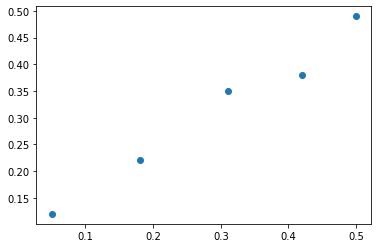

In [99]:
import matplotlib.pyplot as plt 

data = np.array([[0.05, 0.12],
                 [0.18, 0.22],
                 [0.31, 0.35], 
                 [0.42, 0.38], 
                 [0.5, 0.49]])
X, y = data[:,0],data[:,1]
X = X.reshape(len(X), 1)
plt.scatter(X,y)
plt.show()

> $ b = (X^T . X)^{-1} . X^T . y $  

In [100]:
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(b)

[1.00233226]


> $ y = X . b $ 

In [101]:
yhat = X @ b
yhat

array([0.05011661, 0.18041981, 0.310723  , 0.42097955, 0.50116613])

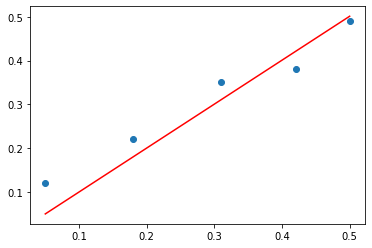

In [107]:
plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.show()

Problem with this approach is the matrix inverse that is both computationally expensive and numerically unstable. An alternative approach is to use a matrix decomposition to avoid this operation.  

**Solve with QR Decomposition** 

> $ X = Q . R $

> $ b = R^{-1} . Q^T . y $

In [104]:
# will use X and y from above 
Q, R = np.linalg.qr(X) # will return Q,R
b = np.linalg.inv(R) @ Q.T @ y 
print(b)

[1.00233226]


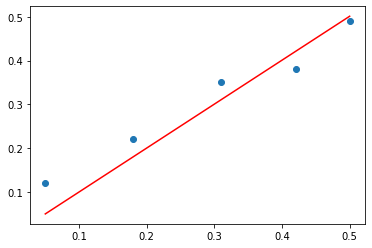

In [106]:
# predict using b 
yhat = X @ b
plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.show()

Same result, QR decomposition is more computationally efficient and more numerically stable but does not work for all data matrices. 

**Solve via SVD and Pseudoinverse**

> $ X = U . \Sigma . V^T $  

> $ b = X^+ . y $

> $ X^+ = U . D^+ . V^T $

In [108]:
b = np.linalg.pinv(X) @ y
print(b)

[1.00233226]


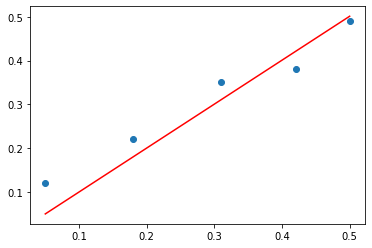

In [109]:
yhat = X @ b
plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.show()

**Solve via Convenience Function**  
The pseudoinverse via SVD approach is the de facto standard. NumPy provides a convenience function named `lstsq()` that solves the linear least squares function using the SVD approach. 
This function takes input X matrix and y vector and returns b coefficients as well as residual errors, the rank of the provided X matrix and the singular values. 

[1.00233226]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


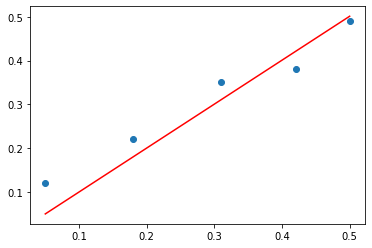

In [110]:
b, residuals, rank, s = np.linalg.lstsq(X, y)
print(b) 

yhat = X @ b 
plt.scatter(X, y)
plt.plot(X, yhat, color="red")
plt.show()